In [1]:
#import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\91896\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv("C:\\Users\\91896\\Downloads\\Gold_data.csv",parse_dates=True, index_col="date")
data.shape

(2182, 1)

In [4]:
#Exploratory Data Analysis
data.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [4]:
data.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


In [5]:
list(data)

['price']

In [6]:
type(data)

pandas.core.frame.DataFrame

In [7]:
data.ndim

2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2016-01-01 to 2021-12-21
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2182 non-null   float64
dtypes: float64(1)
memory usage: 34.1 KB


In [9]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [10]:
data.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


In [11]:
#finding null value
data.isnull()
data.isnull().sum()

price    0
dtype: int64

In [12]:
#finding duplicates
data[data.duplicated()]

,price
date,
2016-04-24,2651.4
2016-04-30,2521.5
2016-06-20,2759.8
2016-08-05,2679.9
2016-09-05,2705.0
...,...
2021-12-06,4413.6
2021-12-09,4219.4
2021-12-12,4333.5


In [13]:
data.skew()

price    0.637312
dtype: float64

C:\Users\91896\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


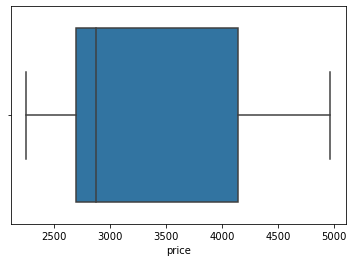

In [14]:
#Outlier Check
outliar = sns.boxplot(data['price'])

In [15]:
#corelation
data.corr()

,price
price,1.0


<AxesSubplot:xlabel='price', ylabel='Density'>

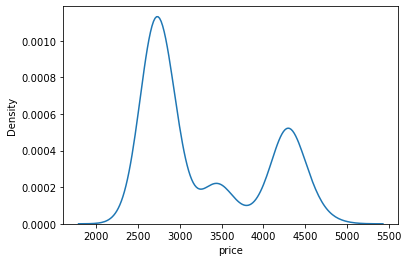

In [16]:
sns.kdeplot(data['price'])

<AxesSubplot:xlabel='date'>

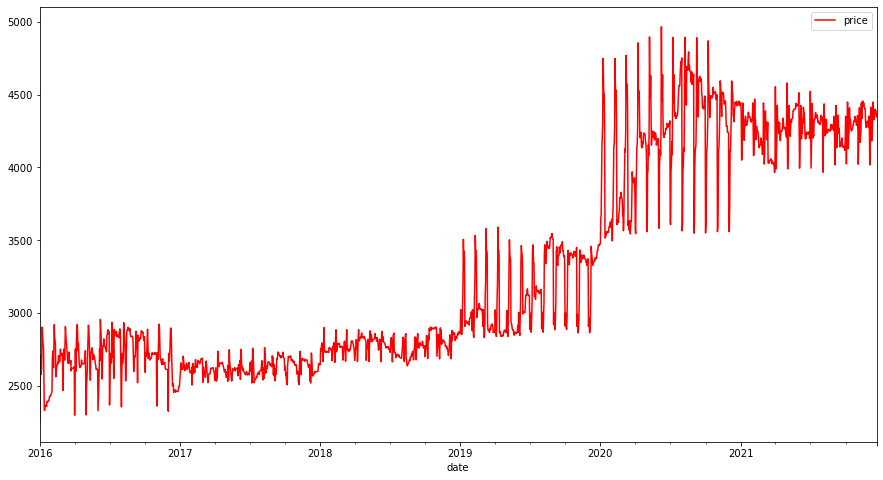

In [17]:
data.plot(figsize = (15,8),color = 'red')

<AxesSubplot:xlabel='date'>

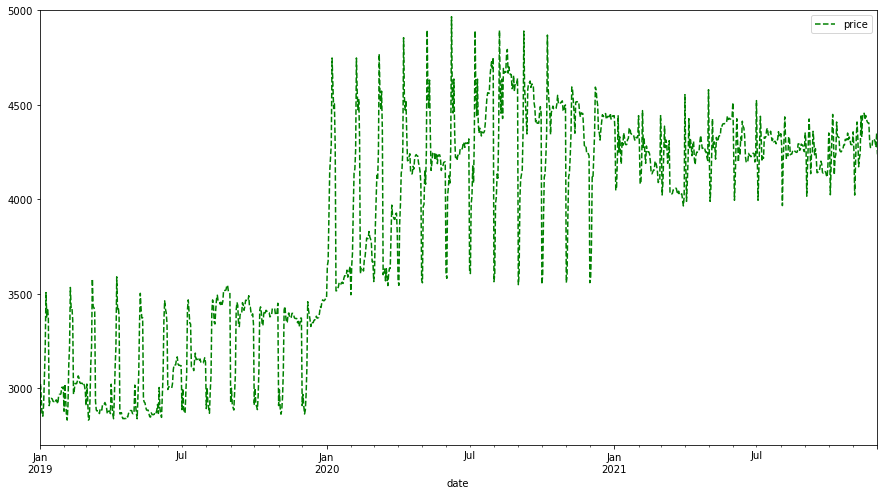

In [18]:
data.plot(xlim = ['2019-01-01','2021-12-01'],ylim = [2700,5000],figsize = (15,8),ls='--',c='green')

                  price
date                   
2016-12-31  2690.614162
2017-12-31  2626.676484
2018-12-31  2781.938082
2019-12-31  3150.210685
2020-12-31  4216.378689
2021-12-31  4266.871549
             price
date              
2016-12-31  2956.6
2017-12-31  2763.4
2018-12-31  2906.0
2019-12-31  3590.4
2020-12-31  4966.3
2021-12-31  4580.3
             price
date              
2016-12-31  2252.6
2017-12-31  2506.5
2018-12-31  2637.9
2019-12-31  2832.7
2020-12-31  3477.6
2021-12-31  3965.3


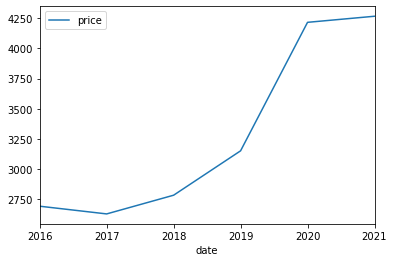

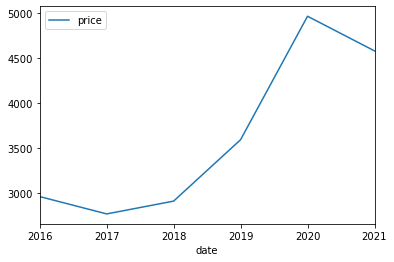

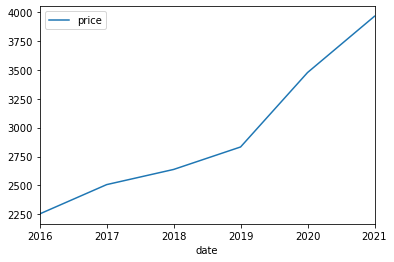

In [19]:
data.resample(rule='A').mean().plot()
data.resample(rule='A').max().plot()
data.resample(rule ='A').min().plot()
print(data.resample(rule='A').mean())
print(data.resample(rule='A').max())
print(data.resample(rule ='A').min())
#checking the mean max and minimam price in yearwise


In [20]:
data_temp = data.copy()
data_temp['Year'] = pd.DatetimeIndex(data_temp.index).year
data_temp['quarter'] = pd.DatetimeIndex(data_temp.index).quarter
data_temp['Month'] = pd.DatetimeIndex(data_temp.index).month
data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week

C:\Users\91896\AppData\Local\Temp/ipykernel_6364/3984424621.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  data_temp['Weeks'] = pd.DatetimeIndex(data_temp.index).week


<AxesSubplot:title={'center':'Seasonality of the Time Series by over the year'}, xlabel='Year', ylabel='price'>

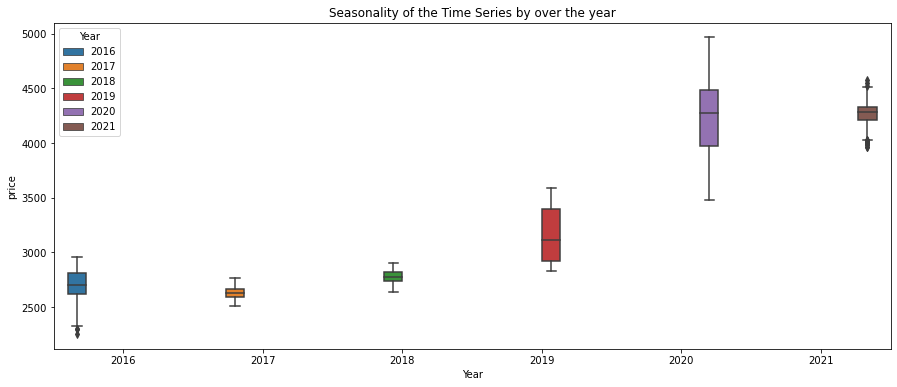

In [21]:
plt.figure(figsize=(15,6))
plt.title('Seasonality of the Time Series by over the year')
sns.boxplot(x='Year',y='price',hue='Year',data=data_temp)

<AxesSubplot:title={'center':'Seasonality of the Time Series quarter wise'}, xlabel='Year', ylabel='quarter'>

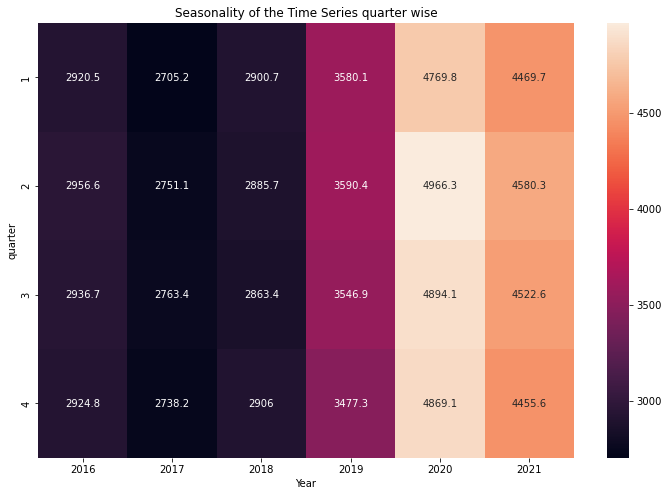

In [22]:
plt.figure(figsize=(12,8))
plt.title('Seasonality of the Time Series quarter wise')
heatmap=pd.pivot_table(data=data_temp,values='price',index=data_temp['quarter'],columns='Year',aggfunc='max',fill_value=0)
sns.heatmap(heatmap,annot = True ,fmt='g')

<AxesSubplot:title={'center':'Seasonality of the Time Series month wise'}, xlabel='Month', ylabel='price'>

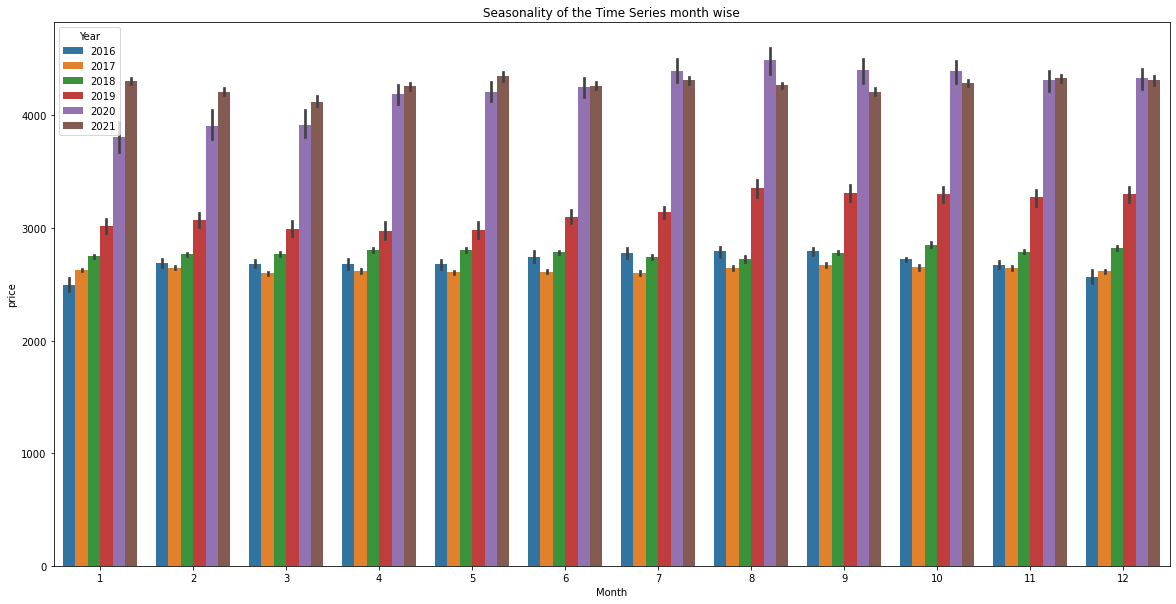

In [23]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series month wise')
sns.barplot(x='Month',y='price',hue='Year',data=data_temp)

<AxesSubplot:title={'center':'Seasonality of the Time Series week wise'}, xlabel='Weeks', ylabel='price'>

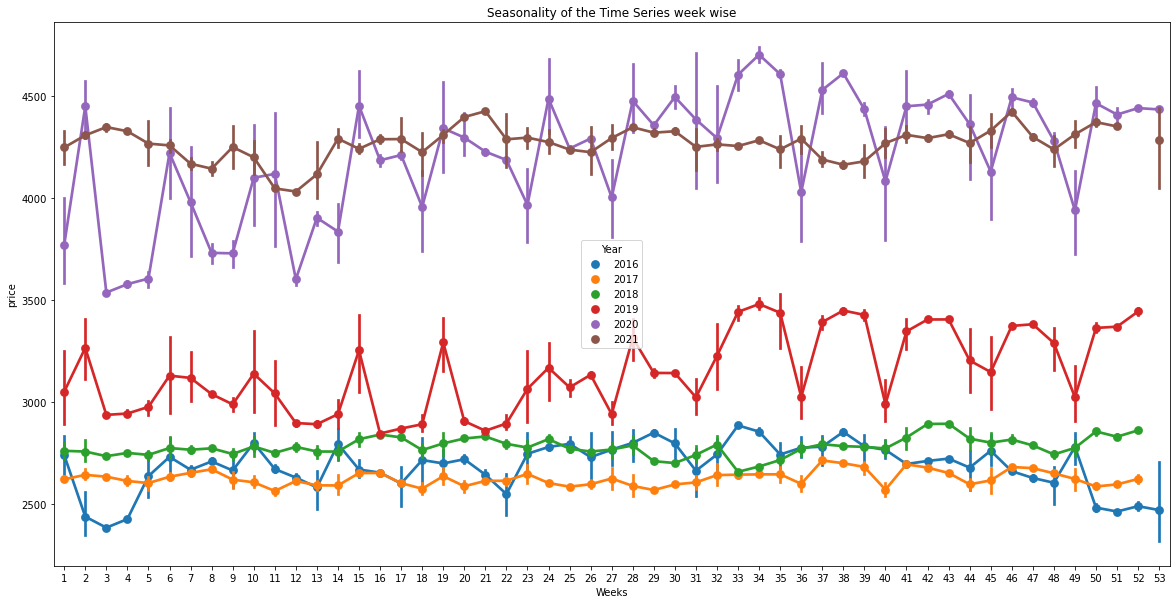

In [24]:
plt.figure(figsize=(20,10))
plt.title('Seasonality of the Time Series week wise')
sns.pointplot(x='Weeks',y='price',hue='Year',data=data_temp)

date
2016-01-01            NaN
2016-01-02            NaN
2016-01-03            NaN
2016-01-04    2587.464286
2016-01-05    2678.207143
                 ...     
2021-12-17    4372.028571
2021-12-18    4374.642857
2021-12-19            NaN
2021-12-20            NaN
2021-12-21            NaN
Name: trend, Length: 2182, dtype: float64
date
2016-01-01   -2.706782
2016-01-02    1.444253
2016-01-03   -2.058103
2016-01-04    0.075277
2016-01-05    0.844394
                ...   
2021-12-17   -2.706782
2021-12-18    1.444253
2021-12-19   -2.058103
2021-12-20    0.075277
2021-12-21    0.844394
Name: seasonal, Length: 2182, dtype: float64
date
2016-01-01          NaN
2016-01-02          NaN
2016-01-03          NaN
2016-01-04    -9.739563
2016-01-05   -81.301537
                ...    
2021-12-17    25.078211
2021-12-18    13.412890
2021-12-19          NaN
2021-12-20          NaN
2021-12-21          NaN
Name: resid, Length: 2182, dtype: float64
date
2016-01-01    2252.60
2016-01-02    2454.50
2016

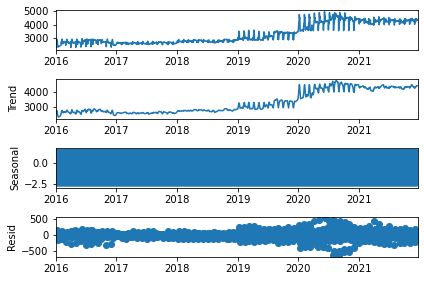

In [25]:
#Additive Decomposition
decomposition = seasonal_decompose(data, model='additive')
print(decomposition.trend)
print(decomposition.seasonal)
print(decomposition.resid)
print(decomposition.observed)
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2017-12-27    2625.261905
2017-12-28    2631.914286
2017-12-29            NaN
2017-12-30            NaN
2017-12-31            NaN
Name: trend, Length: 730, dtype: float64
date
2016-01-02   -3.753432
2016-01-03   -2.990043
2016-01-04    0.048935
2016-01-05    1.065397
2016-01-06    0.737329
                ...   
2017-12-27    0.737329
2017-12-28    6.714600
2017-12-29   -1.822785
2017-12-30   -3.753432
2017-12-31   -2.990043
Name: seasonal, Length: 730, dtype: float64
date
2016-01-02           NaN
2016-01-03           NaN
2016-01-04           NaN
2016-01-05    -81.522539
2016-01-06   -112.573043
                 ...    
2017-12-27      8.600766
2017-12-28     16.871114
2017-12-29           NaN
2017-12-30           NaN
2017-12-31           NaN
Name: resid, Length: 730, dtype: float64
date
2016-01-02    2454.500000
2016-01-03    

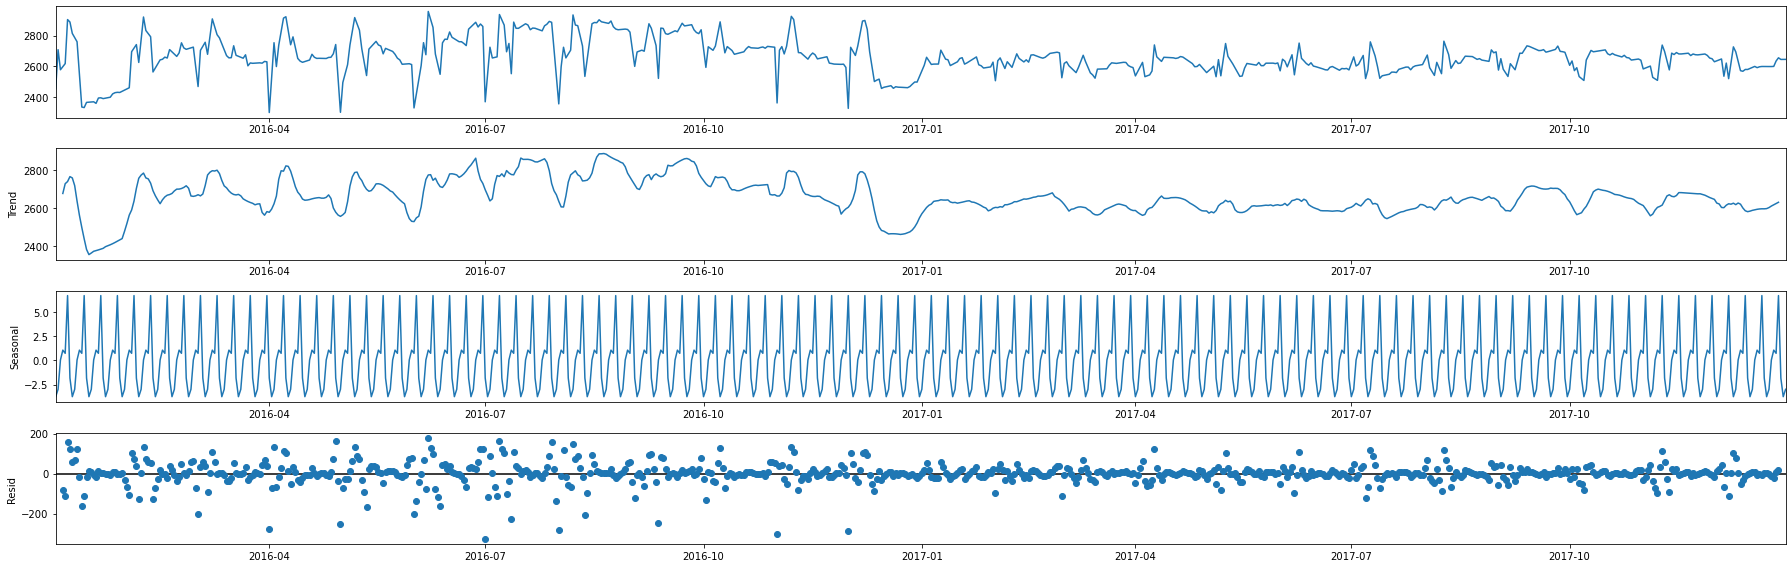

In [26]:
decomposition2 = seasonal_decompose(data.iloc[1:731], model='additive')
print(decomposition2.trend)
print(decomposition2.seasonal)
print(decomposition2.resid)
print(decomposition2.observed)
fig = decomposition2.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2016-12-27    2476.571429
2016-12-28    2486.700000
2016-12-29            NaN
2016-12-30            NaN
2016-12-31            NaN
Name: trend, Length: 365, dtype: float64
date
2016-01-02    -4.948756
2016-01-03    -6.773779
2016-01-04    -2.405665
2016-01-05     0.063811
2016-01-06     4.408774
                ...    
2016-12-27     0.063811
2016-12-28     4.408774
2016-12-29    12.025287
2016-12-30    -2.369671
2016-12-31    -4.948756
Name: seasonal, Length: 365, dtype: float64
date
2016-01-02           NaN
2016-01-03           NaN
2016-01-04           NaN
2016-01-05    -80.520953
2016-01-06   -116.244488
                 ...    
2016-12-27     -7.335239
2016-12-28     -6.808774
2016-12-29           NaN
2016-12-30           NaN
2016-12-31           NaN
Name: resid, Length: 365, dtype: float64
date
2016-01-02    2454.500000
201

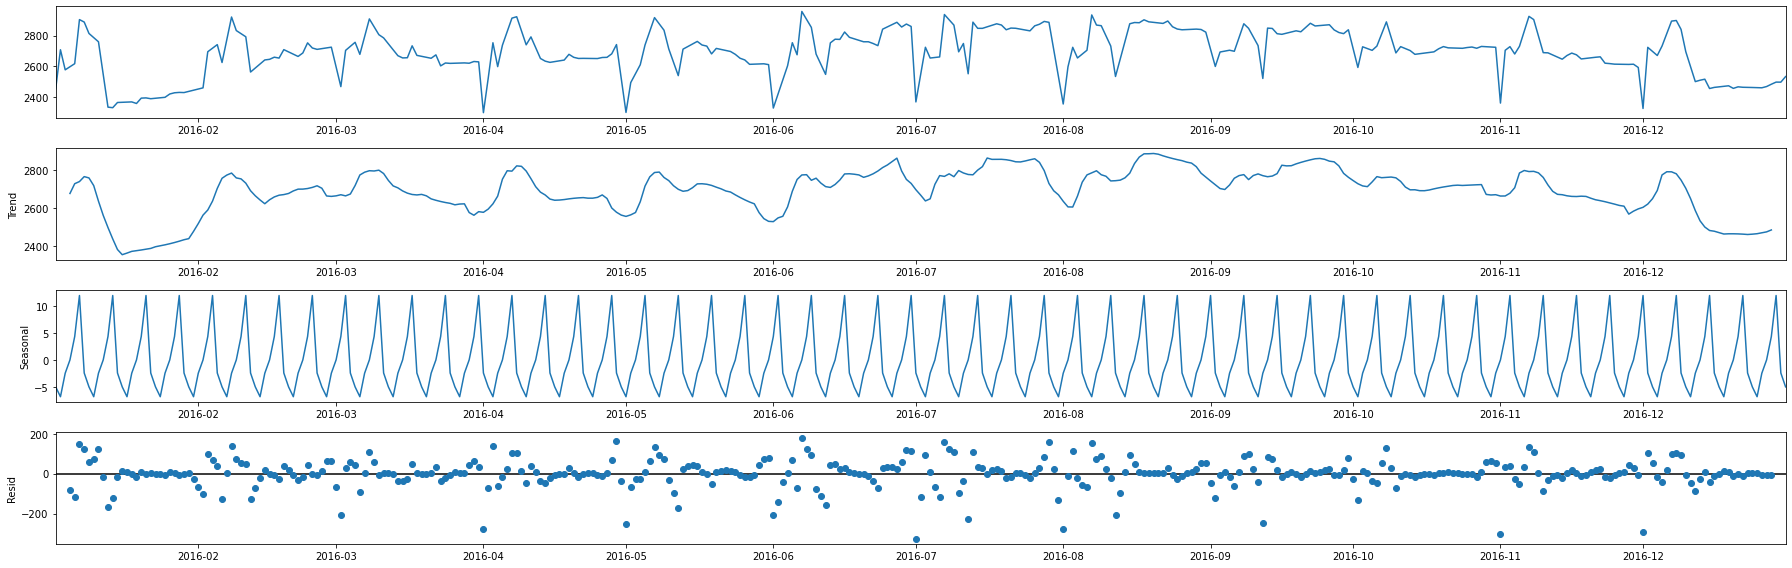

In [27]:
decomposition3 = seasonal_decompose(data.iloc[1:366], model='additive')
print(decomposition3.trend)
print(decomposition3.seasonal)
print(decomposition3.resid)
print(decomposition3.observed)
fig = decomposition3.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
2016-01-07    2740.778571
2016-01-08    2766.778571
2016-01-09    2759.814286
2016-01-10    2719.514286
2016-01-11    2637.828571
2016-01-12    2563.257143
2016-01-13    2499.438095
2016-01-14    2439.657143
2016-01-15    2383.914286
2016-01-16    2356.828571
2016-01-17    2365.185714
2016-01-18    2374.271429
2016-01-19    2377.771429
2016-01-20    2381.523810
2016-01-21    2385.528571
2016-01-22    2389.785714
2016-01-23    2398.571429
2016-01-24    2403.528571
2016-01-25    2408.614286
2016-01-26    2414.314286
2016-01-27    2420.673810
2016-01-28    2427.692857
2016-01-29            NaN
2016-01-30            NaN
2016-01-31            NaN
Name: trend, dtype: float64
date
2016-01-02    14.215816
2016-01-03    15.644388
2016-01-04    30.582483
2016-01-05   -32.071088
2016-01-06   -69.188946
2016-01-07    11.789626
2016-01-08    29.027721
2016-01-09    

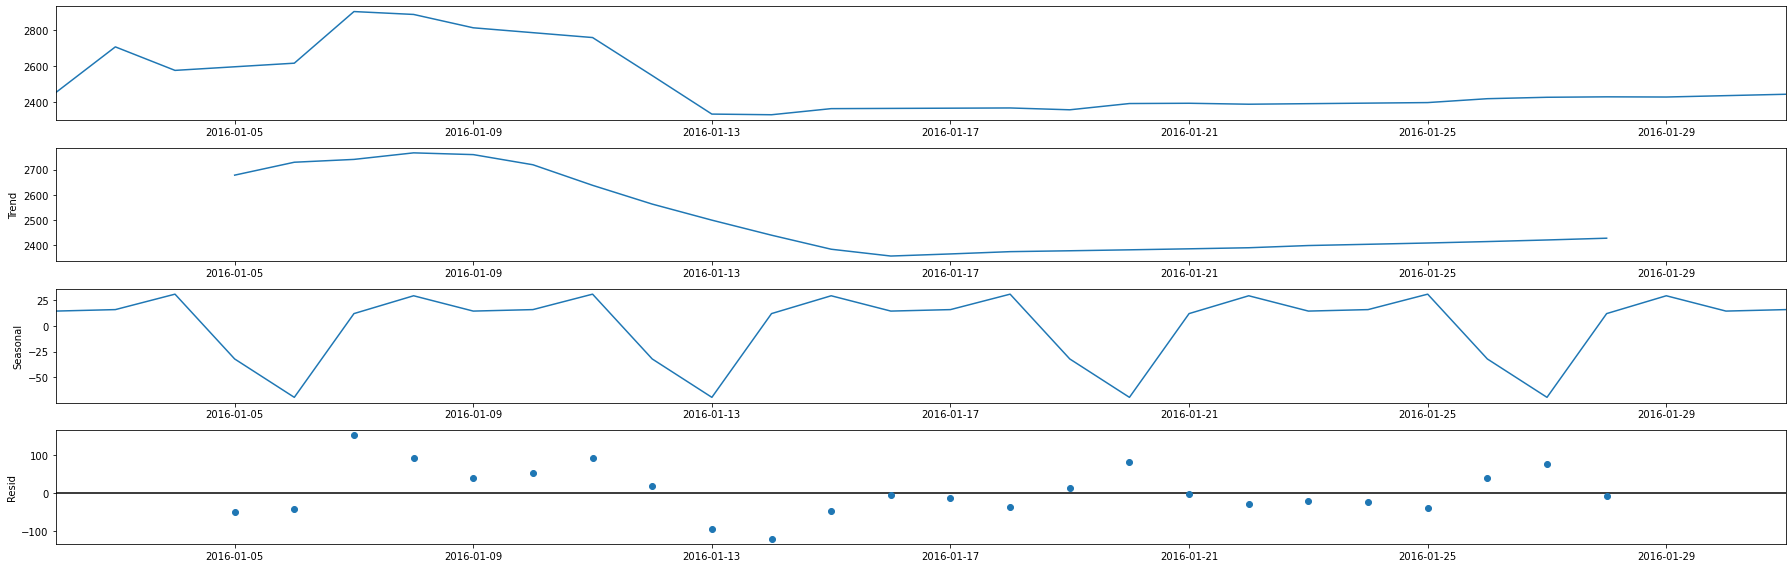

In [28]:
decomposition4 = seasonal_decompose(data.iloc[1:31], model='additive')
print(decomposition4.trend)
print(decomposition4.seasonal)
print(decomposition4.resid)
print(decomposition4.observed)
fig = decomposition4.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
                 ...     
2016-12-27    2476.571429
2016-12-28    2486.700000
2016-12-29            NaN
2016-12-30            NaN
2016-12-31            NaN
Name: trend, Length: 365, dtype: float64
date
2016-01-02    0.998274
2016-01-03    0.997583
2016-01-04    0.999147
2016-01-05    1.000016
2016-01-06    1.001584
                ...   
2016-12-27    1.000016
2016-12-28    1.001584
2016-12-29    1.004282
2016-12-30    0.999114
2016-12-31    0.998274
Name: seasonal, Length: 365, dtype: float64
date
2016-01-02         NaN
2016-01-03         NaN
2016-01-04         NaN
2016-01-05    0.969943
2016-01-06    0.957511
                ...   
2016-12-27    0.997048
2016-12-28    0.997455
2016-12-29         NaN
2016-12-30         NaN
2016-12-31         NaN
Name: resid, Length: 365, dtype: float64
date
2016-01-02    2454.500000
2016-01-03    2708.100000
2016-01-04

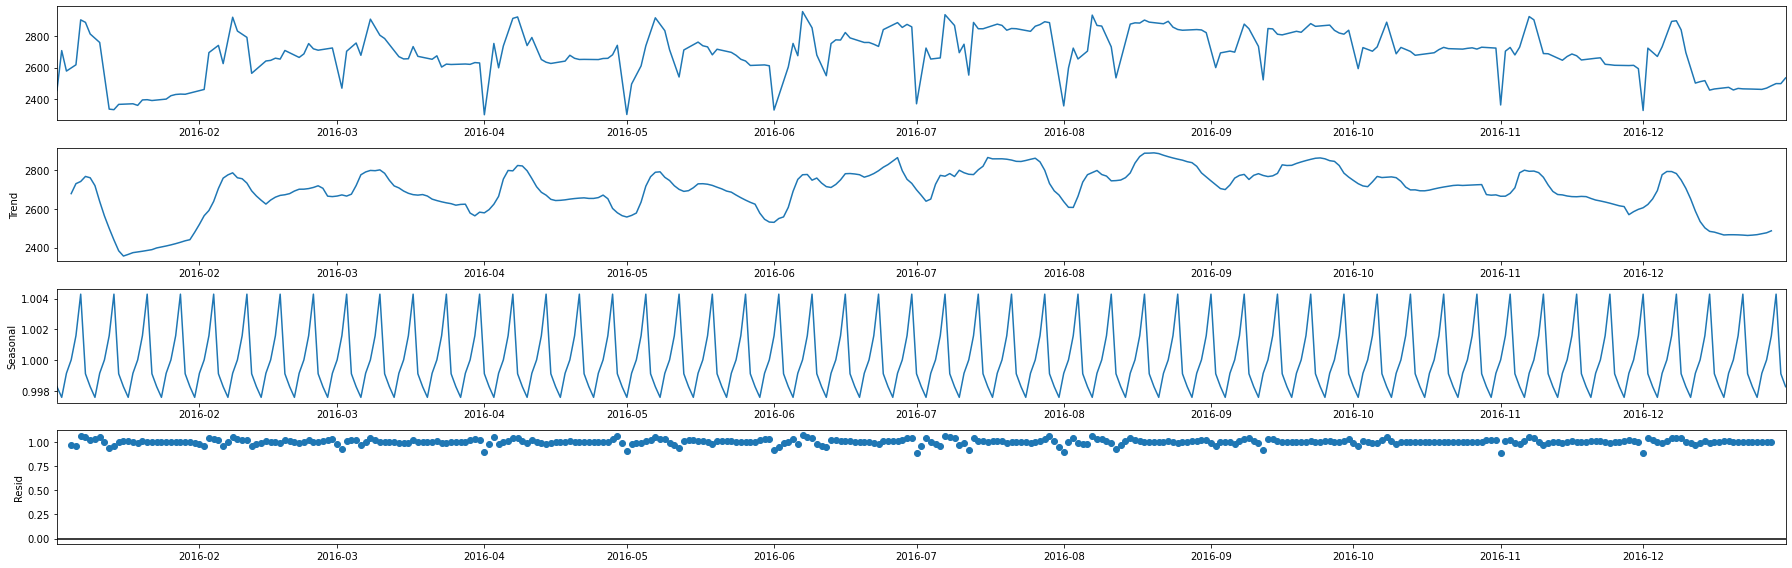

In [29]:
decomposition5 = seasonal_decompose(data.iloc[1:366], model='multiplicative')
print(decomposition5.trend)
print(decomposition5.seasonal)
print(decomposition5.resid)
print(decomposition5.observed)
fig = decomposition5.plot()
plt.rcParams['figure.figsize'] = (25, 8)

date
2016-01-02            NaN
2016-01-03            NaN
2016-01-04            NaN
2016-01-05    2678.207143
2016-01-06    2729.535714
2016-01-07    2740.778571
2016-01-08    2766.778571
2016-01-09    2759.814286
2016-01-10    2719.514286
2016-01-11    2637.828571
2016-01-12    2563.257143
2016-01-13    2499.438095
2016-01-14    2439.657143
2016-01-15    2383.914286
2016-01-16    2356.828571
2016-01-17    2365.185714
2016-01-18    2374.271429
2016-01-19    2377.771429
2016-01-20    2381.523810
2016-01-21    2385.528571
2016-01-22    2389.785714
2016-01-23    2398.571429
2016-01-24    2403.528571
2016-01-25    2408.614286
2016-01-26    2414.314286
2016-01-27    2420.673810
2016-01-28    2427.692857
2016-01-29            NaN
2016-01-30            NaN
2016-01-31            NaN
Name: trend, dtype: float64
date
2016-01-02    1.005635
2016-01-03    1.006092
2016-01-04    1.011867
2016-01-05    0.988272
2016-01-06    0.973974
2016-01-07    1.003653
2016-01-08    1.010506
2016-01-09    1.00563

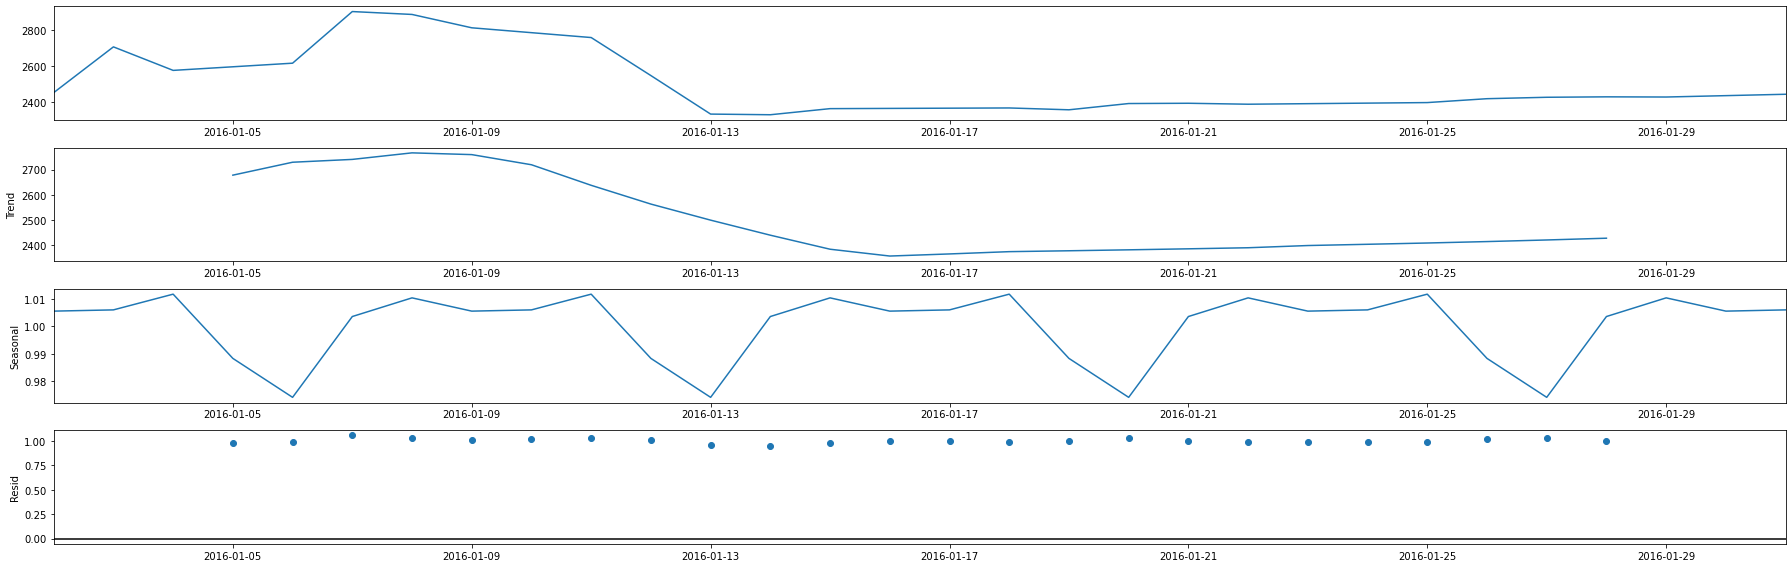

In [30]:
decomposition6 = seasonal_decompose(data.iloc[1:31], model='multiplicative')
print(decomposition6.trend)
print(decomposition6.seasonal)
print(decomposition6.resid)
print(decomposition6.observed)
fig = decomposition6.plot()
plt.rcParams['figure.figsize'] = (25, 8)

In [31]:
#ADFuller Test for stationarity
adf = adfuller(data["price"])[1]
print(f"p value:{adf.round(4)}", ", Series is Stationary" if adf <0.05 else ", Series is Non-Stationary")

p value:0.9241 , Series is Non-Stationary


p value:0.0 , Series is Stationary


<AxesSubplot:xlabel='date'>

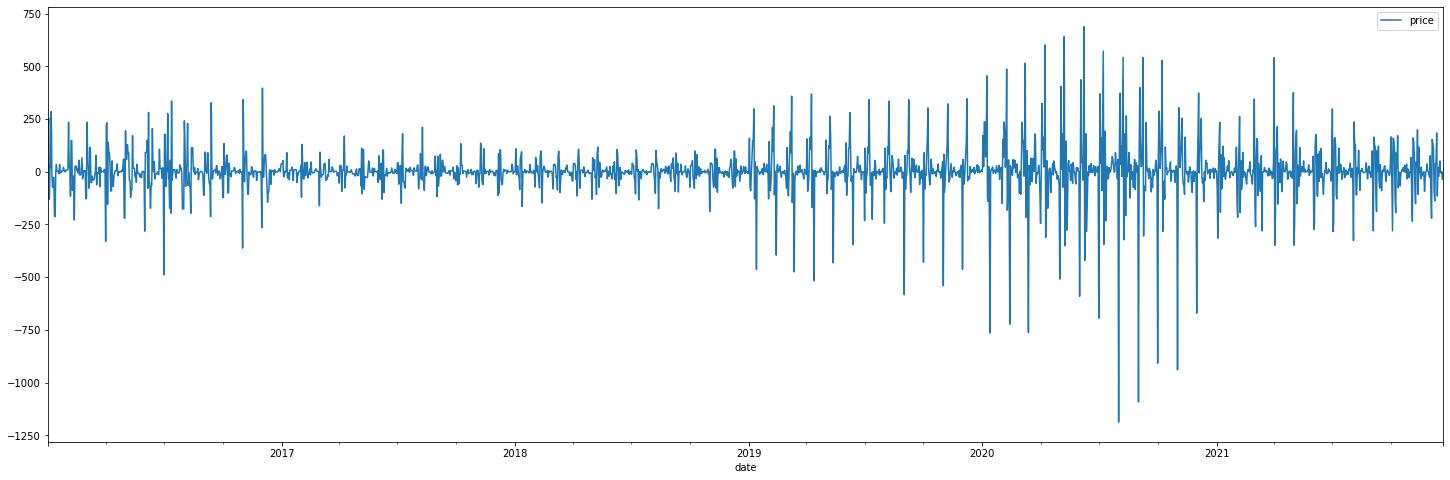

In [32]:
#differencing to make data into stationarity
de_trended = data.diff(1).dropna()
adf2 = adfuller(de_trended)[1]
print(f"p value:{adf2}", ", Series is Stationary" if adf2 <0.05 else ", Series is Non-Stationary")
de_trended.plot()

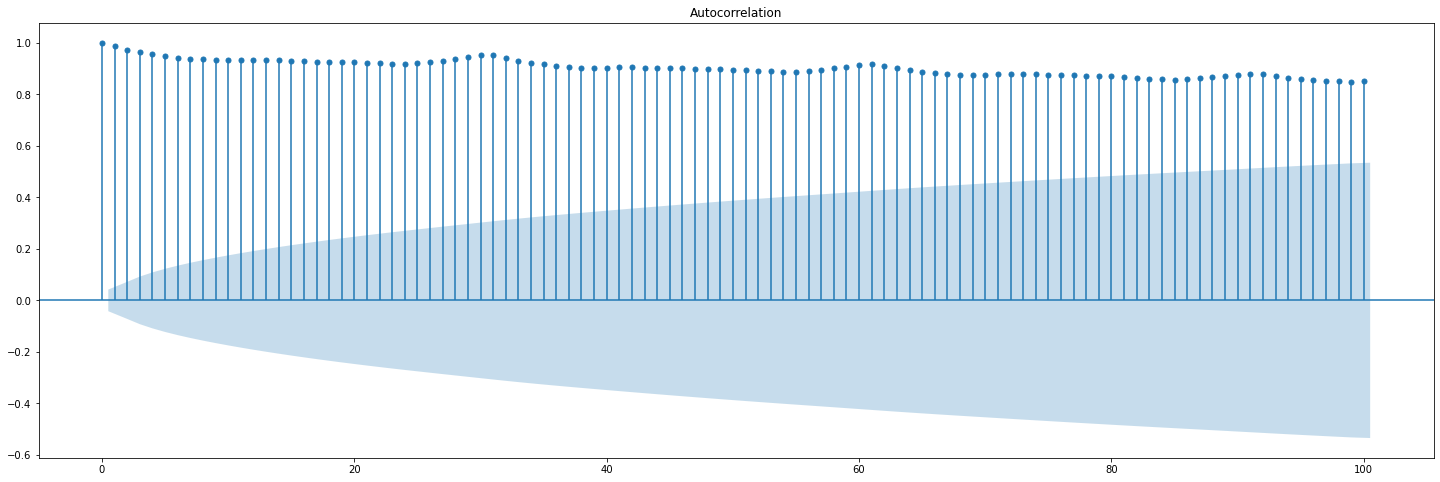

<Figure size 2880x720 with 0 Axes>

In [33]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data,lags = 100)
plt.figure(figsize = (40,10))
plt.show()

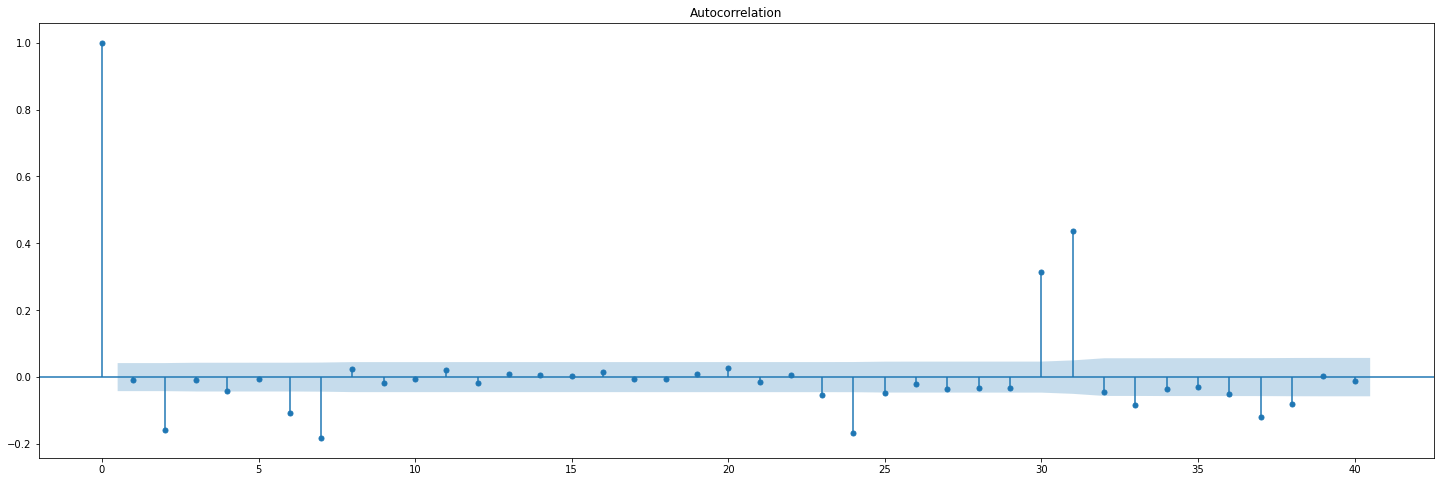

<Figure size 1440x720 with 0 Axes>

In [34]:
#ACF Plot after Differencing
plot_acf(de_trended,lags = 40)
plt.figure(figsize = (20,10))
plt.show()

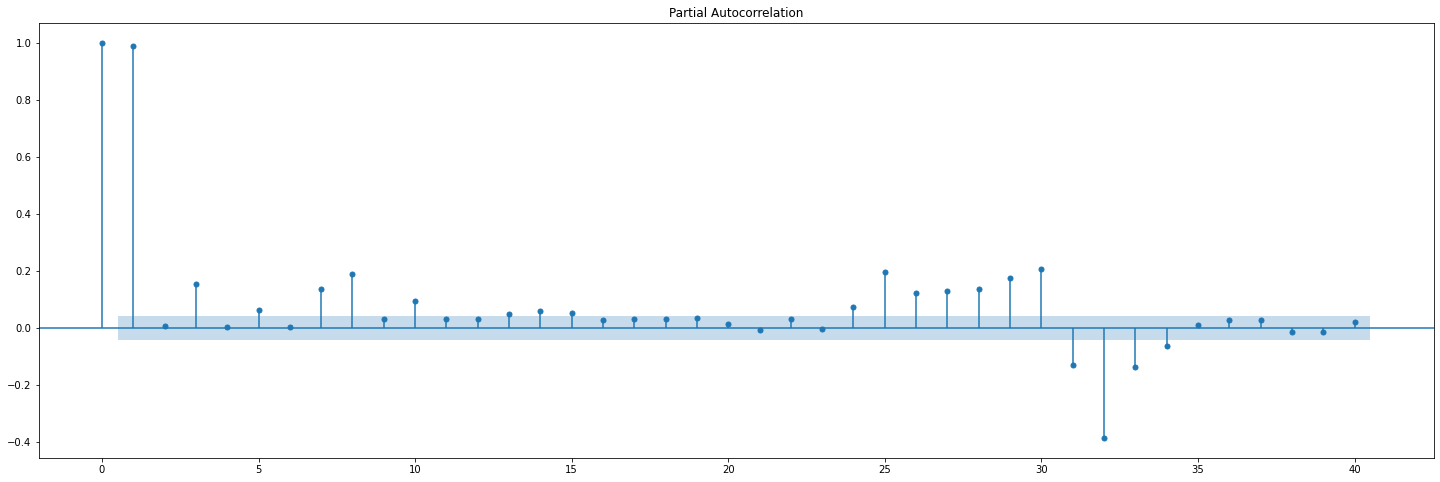

<Figure size 1440x720 with 0 Axes>

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data,lags = 40)
plt.figure(figsize = (20,10))
plt.show()

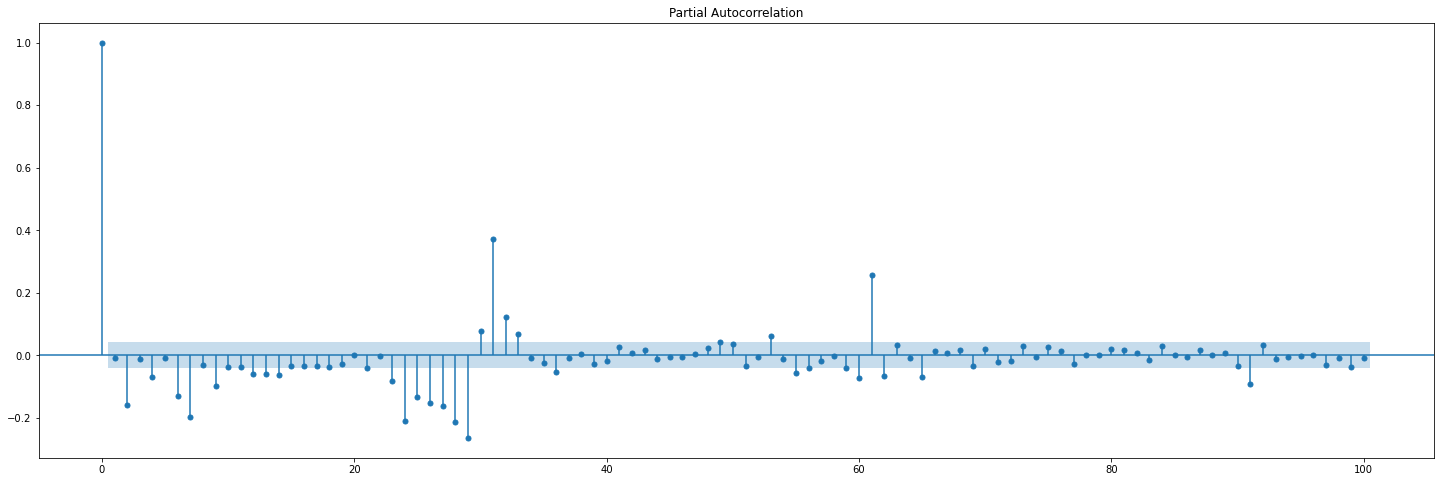

<Figure size 1440x720 with 0 Axes>

In [37]:
#PACF Plot after Differencing
plot_pacf(de_trended,lags = 100)
plt.figure(figsize = (20,10))
plt.show()

In [7]:
data_train = data.iloc[0:1660]
data_test = data.iloc[1660:]

In [42]:
data_train.shape
data_train.head

<bound method NDFrame.head of               price
date               
2016-01-01  2252.60
2016-01-02  2454.50
2016-01-03  2708.10
2016-01-04  2577.80
2016-01-05  2597.75
...             ...
2020-07-13  4349.90
2020-07-14  4376.60
2020-07-15  4370.00
2020-07-16  4335.40
2020-07-17  4355.80

[1660 rows x 1 columns]>

In [43]:
data_test.shape
data_test.head

<bound method NDFrame.head of              price
date              
2020-07-18  4352.3
2020-07-19  4352.3
2020-07-20  4362.2
2020-07-21  4403.8
2020-07-22  4475.2
...            ...
2021-12-17  4394.4
2021-12-18  4389.5
2021-12-19  4389.5
2021-12-20  4354.1
2021-12-21  4346.5

[522 rows x 1 columns]>

# Arima

In [8]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_train, order=(2,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                 1660
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -9953.469
Date:                Fri, 29 Jul 2022   AIC                          19916.938
Time:                        02:14:42   BIC                          19944.008
Sample:                    01-01-2016   HQIC                         19926.972
                         - 07-17-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3115      0.095      3.266      0.001       0.125       0.498
ar.L2          0.3780      0.089      4.266      0.000       0.204       0.552
ma.L1         -0.3654      0.092     -3.991      0.0

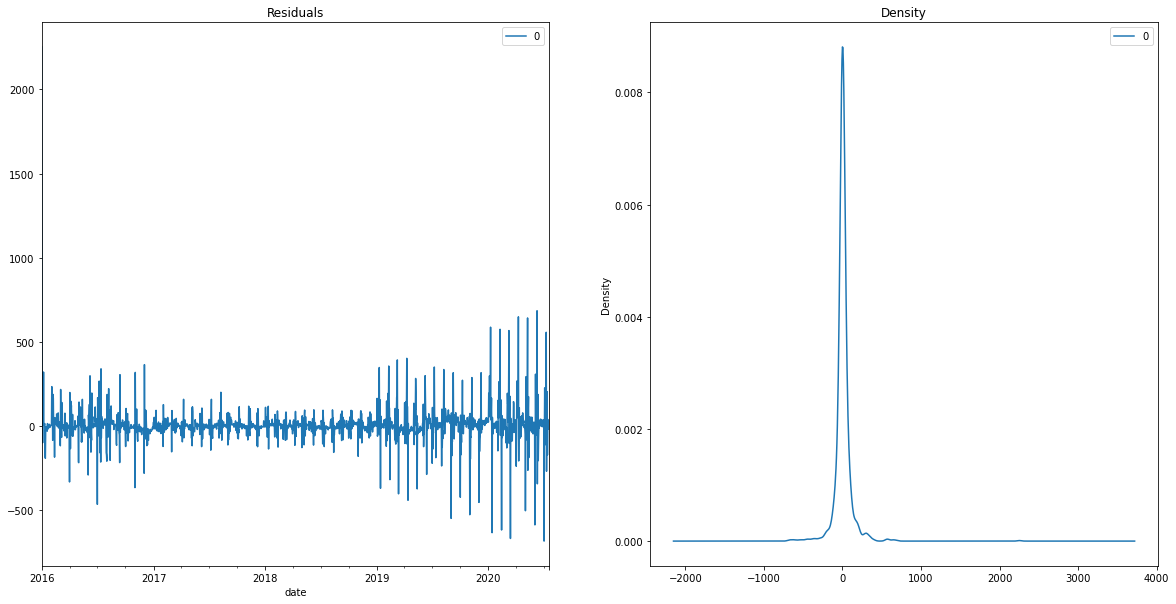

date
2016-01-01    2252.600000
2016-01-02     201.772258
2016-01-03     256.037855
2016-01-04     -99.663876
2016-01-05      70.419620
                 ...     
2020-07-13       1.861199
2020-07-14      32.355717
2020-07-15      18.131560
2020-07-16     -17.255406
2020-07-17      37.875847
Length: 1660, dtype: float64


In [9]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(model_fit.resid)

In [10]:
residuals.describe()

,0
count,1660.000000
mean,7.673356
std,111.927267
min,-683.503001
25%,-16.357150
50%,3.494419
75%,27.195088
max,2252.600000


<AxesSubplot:xlabel='date'>

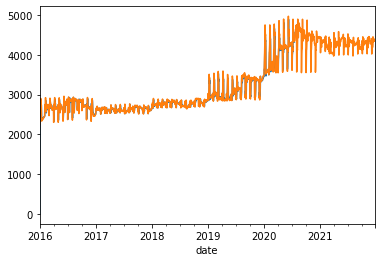

In [12]:
# Actual vs Fitted
model_fit.predict(dynamic=False).plot()
data['price'].plot()

In [16]:
fc = model_fit.forecast(522, alpha=0.05)  # 95% conf
fc 

2020-07-18    4345.237788
2020-07-19    4327.703859
2020-07-20    4318.250401
2020-07-21    4308.678717
2020-07-22    4302.124341
                 ...     
2021-12-17    4275.924994
2021-12-18    4275.924994
2021-12-19    4275.924994
2021-12-20    4275.924994
2021-12-21    4275.924994
Freq: D, Name: predicted_mean, Length: 522, dtype: float64

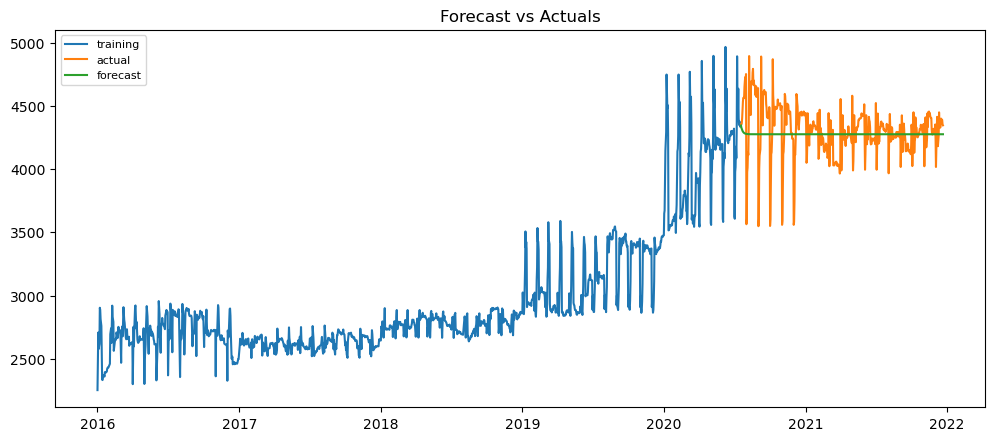

In [18]:
fc_series = pd.Series(fc, index=data_test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [19]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series)))
print(mean_absolute_percentage_error(data_test,fc_series)*100)

195.82497832530848
3.2861111743193256


# Sarima

In [20]:
import statsmodels.api as sm
#mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (1,1,1),seasonal_order = (1,1,1,4))
mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (2,0,2),seasonal_order = (2,1,0,12))
#mod1 = sm.tsa.statespace.SARIMAX(data_train,order = (1,1,1),seasonal_order = (1,1,1,52))
result = mod1.fit()
print(result.summary())

C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\91896\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                      
Dep. Variable:                               price   No. Observations:                 1660
Model:             SARIMAX(2, 0, 2)x(2, 1, [], 12)   Log Likelihood              -10120.160
Date:                             Fri, 29 Jul 2022   AIC                          20254.319
Time:                                     02:25:32   BIC                          20292.171
Sample:                                 01-01-2016   HQIC                         20268.354
                                      - 07-17-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5846      0.052     30.453      0.000       1.483       1.687
ar.L2         -0.6944      

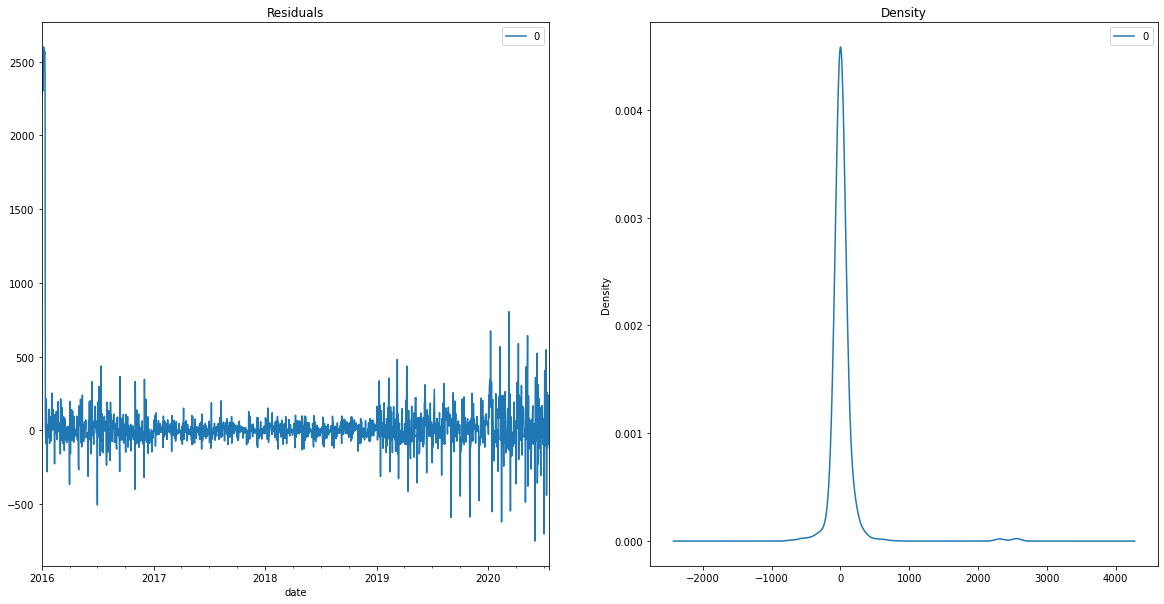

date
2016-01-01    2252.600000
2016-01-02    2344.035219
2016-01-03    2510.661797
2016-01-04    2312.915771
2016-01-05    2300.405003
                 ...     
2020-07-13     242.415622
2020-07-14     -96.630390
2020-07-15      49.743229
2020-07-16      45.178690
2020-07-17     -58.419144
Length: 1660, dtype: float64


In [21]:
residuals2 = pd.DataFrame(result.resid)
fig, ax = plt.subplots(1,2)
residuals2.plot(title="Residuals", ax=ax[0])
residuals2.plot(kind='kde', title='Density', ax=ax[1],figsize=(20,10))
plt.show()
print(result.resid)

In [22]:
residuals.describe()

,0
count,1660.000000
mean,7.673356
std,111.927267
min,-683.503001
25%,-16.357150
50%,3.494419
75%,27.195088
max,2252.600000


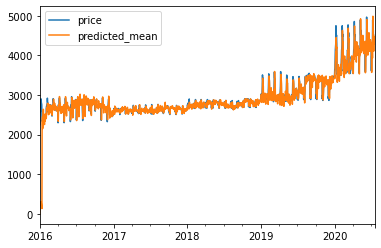

In [23]:
# Actual vs Fitted
forecast1 = result.predict(dynamic=False)
pd.concat([data_train,forecast1],axis=1).plot()
figsize = (20,10)
plt.show()

In [24]:
# Forecast
fc = result.forecast(len(data_test), alpha=0.05)  # 95% conf
fc

2020-07-18    4185.491133
2020-07-19    4210.540390
2020-07-20    4446.108584
2020-07-21    4297.204466
2020-07-22    4272.809017
                 ...     
2021-12-17    4260.727595
2021-12-18    4560.724269
2021-12-19    4377.108911
2021-12-20    4331.905690
2021-12-21    4437.197176
Freq: D, Name: predicted_mean, Length: 522, dtype: float64

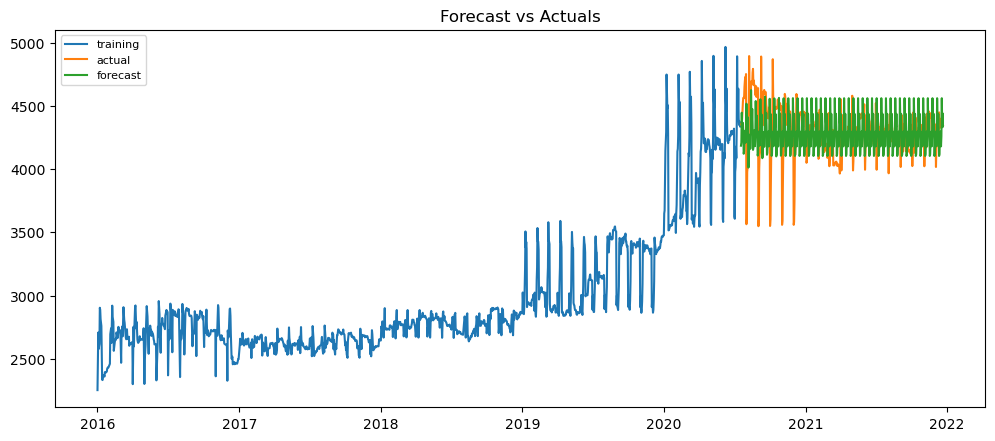

In [25]:
fc_series2 = pd.Series(fc, index=data_test.index)
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_train, label='training')
plt.plot(data_test, label='actual')
plt.plot(fc_series2, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

<AxesSubplot:xlabel='date'>

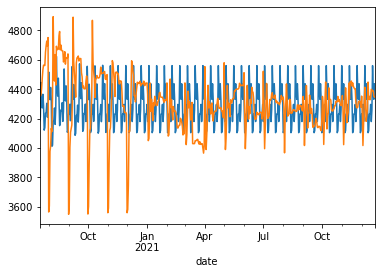

In [26]:
fc_series2.plot()
data_test['price'].plot()

In [27]:
data_test.describe()

,price
count,522.000000
mean,4309.100192
std,193.583164
min,3548.900000
25%,4225.650000
50%,4313.450000
75%,4425.150000
max,4894.100000


In [28]:
fc.describe()

count     522.000000
mean     4288.125433
std       126.035605
min      4012.026834
25%      4193.230666
50%      4272.686324
75%      4359.477118
max      4624.181007
Name: predicted_mean, dtype: float64

In [30]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
print(np.sqrt(metrics.mean_squared_error(data_test,fc_series2)))
print(mean_absolute_percentage_error(data_test,fc_series2)*100)

235.1171498668313
4.17312402607936
